Quadratic Equation Non-LLM based

In [1]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict, Literal

In [2]:
class QuadState(TypedDict):

    a:int
    b:int
    c:int

    equation: str
    discriminant: float
    result: str

In [3]:
def show_equation(state: QuadState) -> QuadState:

    equation = f"{state['a']}x^2 + {state['b']}x + {state['c']}"

    return {'equation': equation}

In [ ]:
def compute_discriminant(state: QuadState) -> QuadState:
    a = state['a']
    b = state['b']
    c = state['c']

    D = b**2 - 4*a*c

    return {
        'discriminant': D
    }

In [10]:
def real_roots(state:QuadState)->QuadState:

    root1= (-state['b'] + state['discriminant']**0.5) / (2*state['a'])
    root2= (-state['b'] - state['discriminant']**0.5) / (2*state['a'])

    result= f"The roots are real: {root1} and {root2}"

    return {'result': result}

In [11]:
def repeated_root(state:QuadState)->QuadState:

    root1= (-state['b']) / (2*state['a'])
  

    result= f"The repeated root : {root1}"

    return {'result': result}

In [12]:
def no_real_roots(state:QuadState)->QuadState:

    result= f"No real roots"

    return {'result': result}

In [14]:
def check_condition(state:QuadState) -> Literal['real_roots', 'repeated_root', 'no_real_roots']:
    # Literal return type to indicate possible branches(i.e which function to call next based on condition)
    D = state['discriminant']
    if D > 0:
        return 'real_roots'
    elif D == 0:
        return 'repeated_root'
    else:
        return 'no_real_roots'

In [15]:
graph =StateGraph(QuadState)

graph.add_node('show_equation',show_equation)
graph.add_node('compute_discriminant',compute_discriminant)
graph.add_node('real_roots', real_roots)
graph.add_node('repeated_root', repeated_root)
graph.add_node('no_real_roots', no_real_roots)

graph.add_edge(START,'show_equation')
graph.add_edge('show_equation','compute_discriminant')

# adding conditional edges
graph.add_conditional_edges('compute_discriminant', check_condition)

graph.add_edge('real_roots',END)
graph.add_edge('repeated_root',END)
graph.add_edge('no_real_roots',END)


workflow=graph.compile()

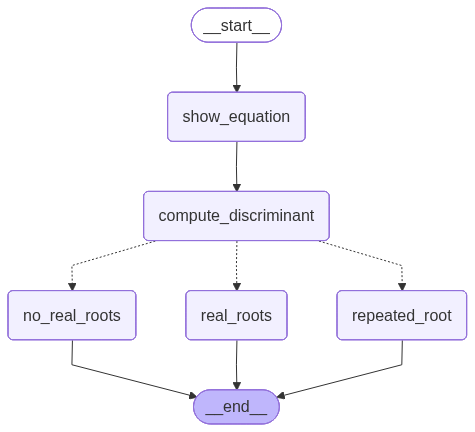

In [16]:
workflow

In [17]:
initial_state={
    'a': 4,
    'b': -5,
    'c': -4
}

workflow.invoke(initial_state)

{'a': 4,
 'b': -5,
 'c': -4,
 'equation': '4x^2 + -5x + -4',
 'discriminant': 89,
 'result': 'The roots are real: 1.8042476415070754 and -0.5542476415070754'}

In [18]:
initial_state={
    'a': -4,
    'b': -5,
    'c': -4
}

workflow.invoke(initial_state)

{'a': -4,
 'b': -5,
 'c': -4,
 'equation': '-4x^2 + -5x + -4',
 'discriminant': -39,
 'result': 'No real roots'}